## PyTorch の依存関係

In [1]:
!nvidia-smi

Fri Sep 26 11:09:24 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 581.15                 Driver Version: 581.15         CUDA Version: 13.0     |
+-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3060      WDDM  |   00000000:01:00.0  On |                  N/A |
|  0%   36C    P8             19W /  170W |     552MiB /  12288MiB |     24%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import torch
print(torch.__version__)

2.8.0+cu126


## テンソル入門
### テンソルの作成

In [3]:
# スカラー
scalar = torch.tensor(42)
print(scalar)
print(scalar.ndim)
print(scalar.item())  # テンソルを通常の Python 整数として取得

tensor(42)
0
42


In [4]:
# ベクトル
vector = torch.tensor([7, 21])
print(vector)
print(vector.ndim)
print(vector.shape)

tensor([ 7, 21])
1
torch.Size([2])


In [5]:
# 行列
Matrix = torch.tensor([[3, 4], [12, 16]])
print(Matrix)
print(Matrix.ndim)
print(Matrix.shape)
print(Matrix[1])

tensor([[ 3,  4],
        [12, 16]])
2
torch.Size([2, 2])
tensor([12, 16])


In [6]:
# テンソル
Tensor = torch.tensor([[[1,   2,  3],
                        [5,  10, 15],   
                        [25, 50, 75]]])
print(Tensor)
print(Tensor.ndim)
print(Tensor.shape)

tensor([[[ 1,  2,  3],
         [ 5, 10, 15],
         [25, 50, 75]]])
3
torch.Size([1, 3, 3])


#### ランダムなテンソル

In [7]:
random_tensor = torch.rand(3, 4)
print(random_tensor)
print(random_tensor.ndim)

tensor([[0.9629, 0.5309, 0.5520, 0.9464],
        [0.0609, 0.7837, 0.4274, 0.5171],
        [0.9784, 0.2049, 0.0955, 0.2421]])
2


In [8]:
# 画像テンソルと同じ形状のランダムテンソルを作成
random_img_tensor = torch.rand(size=(224, 224, 3))  # 高さ・幅・カラーチャンネル（RGB）
print(random_img_tensor.shape)
print(random_img_tensor.ndim)

torch.Size([224, 224, 3])
3


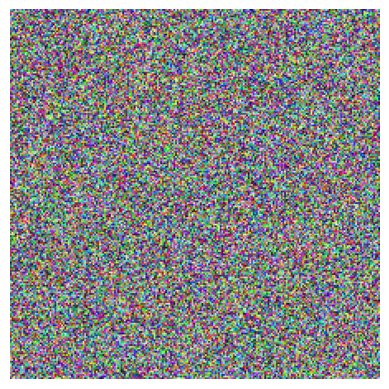

In [9]:
import matplotlib.pyplot as plt
plt.imshow(random_img_tensor.numpy())
plt.axis("off")  # 軸を非表示にする
plt.show()

#### 全ゼロと全イチのテンソル

In [10]:
# 全てゼロのテンソルを作成
zeros_tensor = torch.zeros(size=(3,4))
print(zeros_tensor)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])


In [11]:
zeros_tensor*random_tensor

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [12]:
# 全てイチのテンソルを作成
ones_tensor = torch.ones(size=(3,4))
ones_tensor

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [13]:
ones_tensor.dtype

torch.float32

#### 連続値テンソルとテンソルライクの生成

In [48]:
one_to_ten = torch.arange(1, 11)
one_to_ten

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [49]:
torch.arange(start = 0, end = 100, step = 10)

tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [50]:
torch.zeros_like(input=one_to_ten)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### テンソルのデータ型

**注意:** PyTorch テンソルを扱うときによく遭遇するエラーは3つあります:
* よくあるエラー #1: 形状の不一致
* よくあるエラー #2: デバイスの不一致
* よくあるエラー #3: データ型の不一致


In [17]:
float_32_tensor = torch.tensor([3.0, 6.0, 9.0], 
                               dtype=None,   # torch.float32 | float64 | float16 | bfloat16 | int64 | bool
                               device=None,  # 利用可能なデバイス例: 'cpu' | 'cuda' | 'cuda:0' | 'mps'(Apple Silicon)
                               requires_grad=False)  # True=勾配を追跡する | False=追跡しない
print(float_32_tensor)
float_32_tensor.dtype

tensor([3., 6., 9.])


torch.float32

In [18]:
float_16_tensor = float_32_tensor.type(torch.float16)
float_16_tensor

tensor([3., 6., 9.], dtype=torch.float16)

In [19]:
float_16_tensor*float_32_tensor

tensor([ 9., 36., 81.])

In [20]:
int_32_tensor = torch.tensor([3, 6, 9], dtype=torch.int32)
print(int_32_tensor)
int_32_tensor*float_32_tensor

tensor([3, 6, 9], dtype=torch.int32)


tensor([ 9., 36., 81.])

### テンソルから情報を取得する

In [21]:
some_tensor = torch.rand(3 ,4)
print(f"Datatype of tensor: {some_tensor.dtype}")
print(f"Shape of tensor: {some_tensor.shape}")
print(f"Device of tensor in on: {some_tensor.device}")

Datatype of tensor: torch.float32
Shape of tensor: torch.Size([3, 4])
Device of tensor in on: cpu


## テンソルの操作

In [22]:
# テンソルの加算
tensor = torch.tensor([1,2,3])
tensor + 10

tensor([11, 12, 13])

In [23]:
# 要素ごとの乗算
tensor * 10

tensor([10, 20, 30])

In [24]:
# PyTorch のビルトイン関数
print(torch.mul(tensor, 10))
print(torch.add(tensor, 10))

tensor([10, 20, 30])
tensor([11, 12, 13])


In [25]:
# 行列積
torch.matmul(tensor, tensor)

tensor(14)

In [47]:
# 内側の次元が一致しないとエラーになる:
try:
    torch.matmul(torch.rand(3,2), torch.rand(3,2))
except Exception as e:
    print(e)

mat1 and mat2 shapes cannot be multiplied (3x2 and 3x2)


In [27]:
torch.matmul(torch.rand(2,3), torch.rand(3,2))

tensor([[0.2824, 0.2234],
        [0.0923, 0.3898]])

In [28]:
torch.rand(2,3) @ torch.rand(3,2)

tensor([[1.5164, 1.2582],
        [1.4186, 1.1446]])

In [29]:
tensor_A = torch.tensor([[1,2],[3,4],[5,6]])
tensor_B = torch.tensor([[7,10],[8,11],[9,12]])
# テンソル B を転置して次元を揃える
torch.mm(tensor_A, tensor_B.T)

tensor([[ 27,  30,  33],
        [ 61,  68,  75],
        [ 95, 106, 117]])

### テンソルの集約
#### 最小値・最大値・平均・合計を求める

In [32]:
X = torch.rand(10)
X

tensor([0.8036, 0.6560, 0.2050, 0.5972, 0.6512, 0.5398, 0.2583, 0.2433, 0.2577,
        0.8954])

In [35]:
print(torch.min(X), X.min())

tensor(0.2050) tensor(0.2050)


In [36]:
print(torch.max(X), X.max())

tensor(0.8954) tensor(0.8954)


In [37]:
print(torch.mean(X), X.mean())

tensor(0.5107) tensor(0.5107)


In [ ]:
# ただし次のようにテンソル Y を作成すると:
Y = torch.arange(0,100,10)
Y

tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [46]:
try:
    print(torch.mean(Y), Y.mean())
except Exception as e:
    print(e)

mean(): could not infer output dtype. Input dtype must be either a floating point or complex dtype. Got: Long


In [42]:
torch.mean(Y.type(torch.float32)), Y.type(torch.float32).mean()

(tensor(45.), tensor(45.))

In [43]:
torch.sum(X), X.sum()

(tensor(5.1074), tensor(5.1074))

### 最小値と最大値の位置を求める

In [ ]:
X.argmax(), X.argmin()

(tensor(9), tensor(2))

### リシェイプ、スタック、スクイーズ／アンスクイーズ、パーミュート

In [58]:
# Reshape: 入力テンソルを指定した形状に再構成
X = torch.arange(1.,10.)
print(X, X.shape, X.dim(), "\n")
X_reshaped = X.reshape(3,3)
print(f"reshaped tensor X: \n")
print(X_reshaped, X_reshaped.shape)

tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.]) torch.Size([9]) 1 

reshaped tensor X: 

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]]) torch.Size([3, 3])


In [61]:
# View: 元のメモリを共有したまま指定形状のビューを返す
Z = X.view(3,3)
Z

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [63]:
Z[:,0] = 100
Z, X

(tensor([[100.,   2.,   3.],
         [100.,   5.,   6.],
         [100.,   8.,   9.]]),
 tensor([100.,   2.,   3., 100.,   5.,   6., 100.,   8.,   9.]))

In [67]:
# Stack: 複数のテンソルを縦方向や横方向に結合する
X = torch.arange(1.,10.)
X_stacked_v = torch.stack([X, X, X])
X_stacked_v

tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.],
        [1., 2., 3., 4., 5., 6., 7., 8., 9.],
        [1., 2., 3., 4., 5., 6., 7., 8., 9.]])

In [69]:
X_stacked_h = torch.stack([X, X, X], dim=1)
X_stacked_h

tensor([[1., 1., 1.],
        [2., 2., 2.],
        [3., 3., 3.],
        [4., 4., 4.],
        [5., 5., 5.],
        [6., 6., 6.],
        [7., 7., 7.],
        [8., 8., 8.],
        [9., 9., 9.]])

In [75]:
# Squeeze: テンソルからサイズ1の次元を取り除く
P = torch.rand(3, 2, 1)
print(P)
print(P.shape)
print("After tensor got squeezed: \n")
print(P.squeeze())
print(P.squeeze().shape)

tensor([[[0.0690],
         [0.2518]],

        [[0.3812],
         [0.3565]],

        [[0.7217],
         [0.8320]]])
torch.Size([3, 2, 1])
After tensor got squeezed: 

tensor([[0.0690, 0.2518],
        [0.3812, 0.3565],
        [0.7217, 0.8320]])
torch.Size([3, 2])


In [77]:
# Unsqueeze: 対象にサイズ1の次元を追加する
Q = torch.rand(3, 2, 3)
print(Q.unsqueeze(dim = 0).shape)
print(Q.unsqueeze(dim = 1).shape)

torch.Size([1, 3, 2, 3])
torch.Size([3, 1, 2, 3])


In [79]:
# Permute: 指定した順序で次元を入れ替えたビューを返す
R = torch.randn(2, 3, 5)
print(R.size(), "\n")
print("After permutation: \n")
torch.permute(R, (2, 0, 1)).size()

torch.Size([2, 3, 5]) 

After permutation: 



torch.Size([5, 2, 3])

In [80]:
img_tensor = torch.rand(size = (224, 224, 3))
torch.permute(img_tensor, (2, 0, 1)).size()

torch.Size([3, 224, 224])

## インデクシング

In [81]:
X = torch.arange(1, 10).reshape(1, 3, 3)
X

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])

In [82]:
X[0]

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [83]:
X[0][1]

tensor([4, 5, 6])

In [84]:
X[0,1]

tensor([4, 5, 6])

In [85]:
X[0][0][0]

tensor(1)

In [86]:
X[:,0]

tensor([[1, 2, 3]])

## PyTorch テンソルと NumPy

### NumPy 配列をテンソルへ変換

In [87]:
import numpy as np

array = np.arange(1.0, 10.0)
tensor = torch.from_numpy(array)
array, tensor

(array([1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.], dtype=torch.float64))

In [88]:
array.dtype, tensor.dtype

(dtype('float64'), torch.float64)

In [90]:
torch.arange(1.0, 10.0).dtype

torch.float32

In [ ]:
# 配列の値を変更してもテンソルの値は変わらない
array = array + 1
array, tensor

(array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.], dtype=torch.float64))

In [93]:
# テンソルを NumPy 配列へ変換
ones_tensor = torch.ones(8)
ones_numpy = ones_tensor.numpy()
ones_tensor, ones_numpy

(tensor([1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32))

In [94]:
# テンソルを変更する
ones_tensor = ones_tensor + 1
ones_tensor, ones_numpy

(tensor([2., 2., 2., 2., 2., 2., 2., 2.]),
 array([1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32))

## 再現性

再現性とは、ニューラルネットワークモデルから可能な限りランダム性を排除しようとすることです。


In [102]:
# ランダムだが再現性のあるテンソルを作成
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)

random_tensor_A = torch.rand(3, 4)
random_tensor_B = torch.rand(3, 4)
print(random_tensor_A)
print(random_tensor_B)
random_tensor_B == random_tensor_A

tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[0.8694, 0.5677, 0.7411, 0.4294],
        [0.8854, 0.5739, 0.2666, 0.6274],
        [0.2696, 0.4414, 0.2969, 0.8317]])


tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])

In [103]:
torch.manual_seed(RANDOM_SEED)
random_tensor_A = torch.rand(3, 4)
torch.manual_seed(RANDOM_SEED)
random_tensor_B = torch.rand(3, 4)
print(random_tensor_A)
print(random_tensor_B)
assert torch.equal(random_tensor_A, random_tensor_B)

tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])


PyTorch における再現性について詳しくは、https://docs.pytorch.org/docs/stable/notes/randomness.html を参照してください


## PyTorch で GPU を利用する

In [104]:
torch.cuda.is_available()

True

In [105]:
# デバイス非依存コードを設定
device = "cuda" if torch.cuda.is_available() else "cpu"

In [106]:
# テンソルとモデルを GPU に配置
tensor_on_cpu = torch.tensor([1,2,3], device="cpu")
print(tensor_on_cpu, tensor_on_cpu.device)
tensor_on_gpu = tensor.to(device)
tensor_on_gpu

tensor([1, 2, 3]) cpu


tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.], device='cuda:0',
       dtype=torch.float64)

In [110]:
# Cannot convert GPU tensor back into numpy arrays 
try:
    tensor_on_gpu.numpy()
except Exception as e:
    print("Error: ",e)

Error:  can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.


In [ ]:
# ただし CPU 上のテンソルは変換できる
tensor_on_cpu = tensor_on_gpu.to("cpu")
print(tensor_on_cpu.numpy())
# もしくは次のように変換できる
print(tensor_on_gpu.cpu().numpy)

array([1., 2., 3., 4., 5., 6., 7., 8., 9.])